In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

project_path = "/content/drive/MyDrive/HeartProject"
data_path = os.path.join(project_path, "data")

# Load
X_scaled_df = pd.read_csv(os.path.join(data_path, "X_scaled.csv"))
y = pd.read_csv(os.path.join(data_path, "y.csv")).squeeze()

print("✅ Data loaded successfully from Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully from Google Drive!


# Step 2 — PCA (Visualization only)
We apply Principal Component Analysis (PCA) to visualize the dataset:
1. Plot explained variance ratio (cumulative).
2. Visualize the data using the first two principal components (PC1 and PC2).


Explained variance ratio: [0.18995818 0.09332318 0.08128874 0.07471348 0.07281696 0.06712585
 0.05742977 0.0503162  0.04825454 0.0451006  0.04313879 0.03957069
 0.03807293 0.03102809 0.02313375 0.02220122 0.01657576 0.00595127]


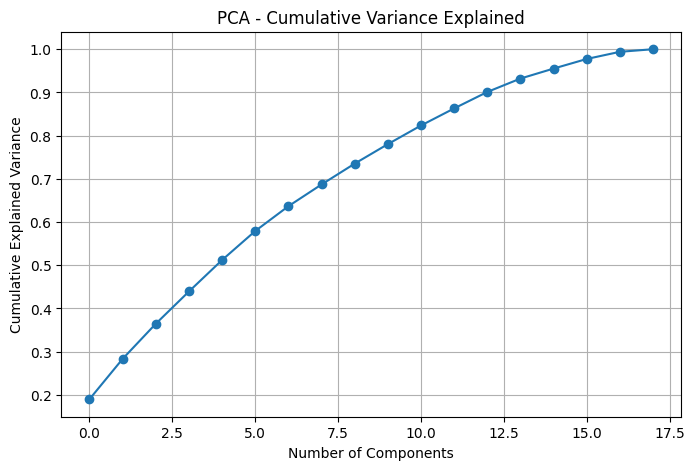

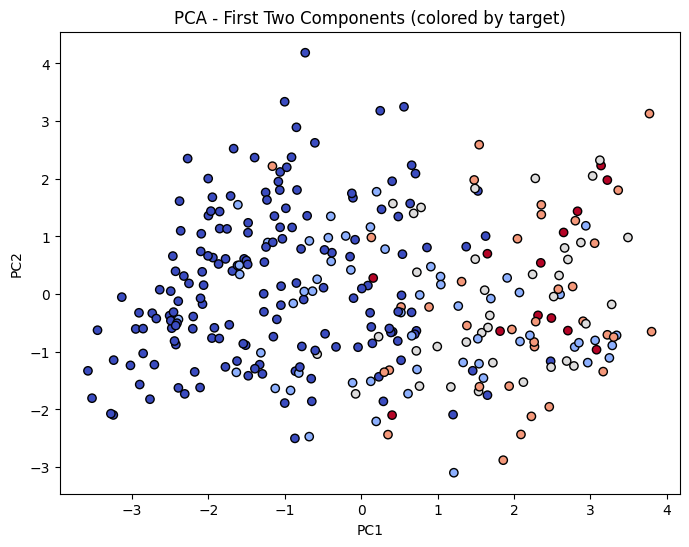

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in X_scaled_df before applying PCA
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Identify numeric columns for imputation, excluding boolean columns from one-hot encoding
numeric_cols = X_scaled_df.select_dtypes(include=np.number).columns.tolist()
X_scaled_imputed_array = imputer.fit_transform(X_scaled_df[numeric_cols])
X_scaled_imputed_df = pd.DataFrame(X_scaled_imputed_array, columns=numeric_cols)

# Re-add boolean columns to the imputed dataframe
boolean_cols = X_scaled_df.select_dtypes(include='bool').columns.tolist()
X_scaled_imputed_df = pd.concat([X_scaled_imputed_df, X_scaled_df[boolean_cols].reset_index(drop=True)], axis=1)


# Apply PCA (keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled_imputed_df) # Apply PCA on the imputed and scaled data

# 1. Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# 2. Cumulative variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()

# 3. Scatter plot of first 2 components
plt.figure(figsize=(8,6))
# Ensure y has the same index or length as X_pca
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components (colored by target)")
plt.show()